# Example 2. Hand-made Perceptron Linear Algorithm (PLA) in shuffled data
------
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_regions import * 

---
### Load and setup data/variables 
1\. Input Iris.data (.CSV) with *pandas* to be a dataframe (df)

In [2]:
df0 = pd.read_csv('iris.data', header=None)[:100] # Keep data from 0-99
df0.columns = ['sepal_length', 'x_1', 'petal_length', 'x_3', 'type']
df0.tail()
#df0.iloc[:]

,sepal_length,x_1,petal_length,x_3,type
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [3]:
# Optional : Shuffle (fix the seed) order of data, list last 10 rows
np.random.seed(4) # welcome to play arround the number to observe
df = df0.reindex(np.random.permutation(df0.index))
df.iloc[90:]

,sepal_length,x_1,petal_length,x_3,type
98,5.1,2.5,3.0,1.1,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa


2\. Extract 100 data from dataframe df 
* No.4 colume to y
* No.0 & 2 columes to be X, with 2-D variables 

In [4]:
# Filling y and X
y = df.iloc[:, 4].values
X = df.iloc[:, [0,2]].values
#print ("y :", y)
#print ("X :", X)

3\. Change the text to distigushable real rumber in y

In [5]:
y = np.where(y == 'Iris-setosa', -1, 1)

4\. Visualize the current distrubtion from data

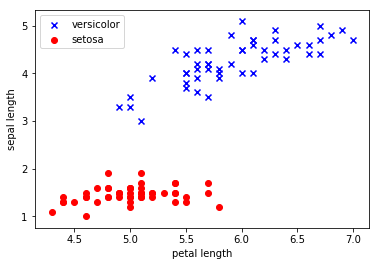

In [6]:
# Ploting : significance variables
plt.scatter(X[ y == 1, 0], X[ y == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[ y ==-1, 0], X[ y ==-1, 1], color='red',  marker='o', label='setosa')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

---
### Run hand-made Perceptron
1\. Import hand-made Perceptron class

In [7]:
from Perceptron import Perceptron

2\. Running percepton algorithm with 10 times iterations....

In [8]:
# Percpetron setting
ppn_10 = Perceptron(eta=0.1, n_iter=10)
ppn_10.fit(X,y)

3\. Finished and visualizing the misclassifications as function of iterations

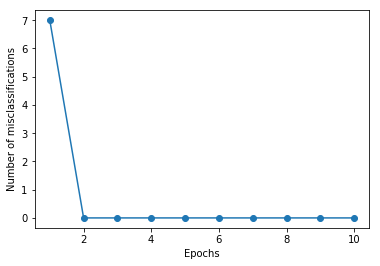

In [9]:
# Plotting
plt.plot
plt.plot(range(1, len(ppn_10.errors_) + 1), ppn_10.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [10]:
print 'weight w: '+str(ppn_10.w_)
print 'Activation function: %.2f + %.2f*x_1 + %.2f*x_2'%(ppn_10.w_[0], ppn_10.w_[1], ppn_10.w_[2])

weight w: [-0.2  -0.56  1.34]
Activation function: -0.20 + -0.56*x_1 + 1.34*x_2


4\. Visualize decision regions
Import hand-made funciton & plot

In [11]:
from plot_decision_regions import * 
#plt.plot([0., 8., 0., 6.])
plot_decision_regions( X, y, classifier=ppn_10, resolution=0.01 )
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
#plt.show()

In [12]:
x = np.arange(0., 8., 0.1)
c0 = -1*ppn_10.w_[0]/ppn_10.w_[2]
c1 = -1*ppn_10.w_[1]/ppn_10.w_[2]

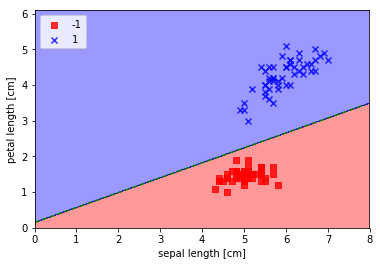

Green line : y = 0.15 + 0.42*x = 0
Blue y > 0, red y < 0


In [13]:
plt.plot(x, c0+c1*x, 'g--')
plt.show()
print 'Green line : y = %.2f + %.2f*x = 0'%(c0, c1)
print 'Blue y > 0, red y < 0'

###  Conclusion of halfway
We find the PLA can learn much fast and efficient than without mis-ordering the dataframe, but taking care the seeds. The good decision region can be found in a iteration with 7 times of weight updating, i.e. encounting 7 misclassications during *online learning*. Next let see how the decision region is chosen! 
The orther funnay and important things you may find if playing arround the random seed number. You can find the final decision region is moving between the two point of *versicolor* and *setosa*. To solve the problem, the Suport Vector Machine (SVM) may can give a reasonable solution.

### Visualize the changes during learning 
1\. Bulid a PLA calss again, but without iteration and adding stop point

In [14]:
class Perceptron_stop(object):
    
    def __init__(self, eta=0.01, n_features=1):
        self.eta = eta
        self.w_ = np.zeros(1 + n_features) # initial w_ = [w_0,w_1....w_features] = 0
        self.stop_ = 0
        self.error_ = 0
        self.errorId_ = []
        
    def fit(self, X, y, stop=y.shape[0]):
        if self.w_.shape[0]-1 != X.shape[1]:
            print '[ERROR] Can not fit. The features must have same number.'
            return self
        
        i = self.stop_
        
        while i < stop:
            update = self.eta * (y[i] - self.predict(X[i])) # = eta.dy
            # dw = eta.dy.X = update.X
            self.w_[1:] += update * X[i] 
            self.w_[0]  += update
            if update != 0:
                self.error_ += 1
                self.errorId_.append(i)
            i += 1
            
        self.stop_ = i
        return self

    def net_input(self, X):
        # w.X = w'.X' + w_0.X_0, (X_0 = 1)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # y = sign(w.X)
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def checkMisclassified(self, X, y):
        self.misc = np.array([])

        for xi, target in zip(X,y):
            check = target * self.predict(xi)
            if check < 0 :
                if len(self.misc) == 0:
                    self.misc = np.append(self.misc, xi)
                else :
                    self.misc = np.vstack((self.misc, xi))

        return len(self.misc)

2\. Define plot and information function

In [15]:
def plot_stop(pps):
    n_misc = pps.checkMisclassified(X, y)
    # print info.
    print '---- Ran over '+str(pps.stop_)+' data, stop at id '+str(pps.stop_-1)+' ----'
    print 'weight :'+str(pps.w_)
    print 'misclass (online): '+str(pps.error_)
    print 'misclass (test)  : '+str(n_misc)
    # Plotting
    plot_decision_regions( X, y, classifier=pps )
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left', title='Ran # of data: '+str(pps.stop_+1))
    # Emphasize the stop point
    plt.scatter( X[pps.stop_-1][0], X[pps.stop_-1][1], marker='o', c='none', edgecolors='g', s=100, linewidth=2)
    plt.show()

3\. Test the class & function, then print out the learning data points 

In [16]:
pps_test = Perceptron_stop(eta=0.1, n_features=X.shape[1])

---- Ran over 100 data, stop at id 99 ----
weight :[-0.2  -0.56  1.34]
misclass (online): 7
misclass (test)  : 0


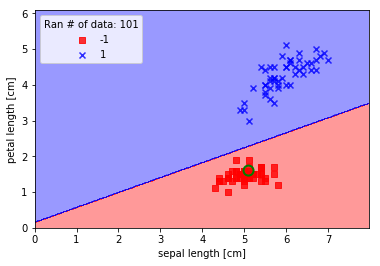

Online learning data id: [0, 2, 3, 4, 5, 6, 8]


In [17]:
pps_test.fit(X, y)
plot_stop(pps_test)
print 'Online learning data id: '+str(pps_test.errorId_)

4\. Use the learning data id to see the changes

In [18]:
pps = Perceptron_stop(eta=0.1, n_features=X.shape[1])

---- Ran over 1 data, stop at id 0 ----
weight :[-0.2  -1.08 -0.34]
misclass (online): 1
misclass (test)  : 50


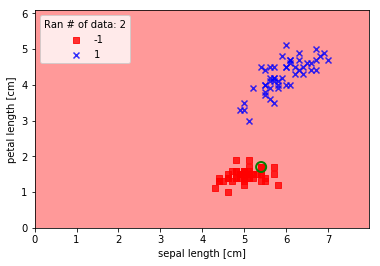

---- Ran over 3 data, stop at id 2 ----
weight :[ 0.    0.06  0.5 ]
misclass (online): 2
misclass (test)  : 50


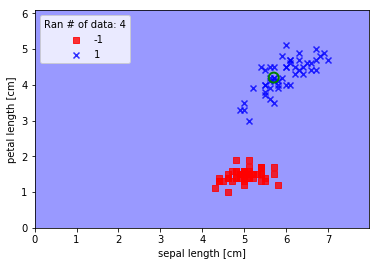

---- Ran over 4 data, stop at id 3 ----
weight :[-0.2  -1.02  0.24]
misclass (online): 3
misclass (test)  : 50


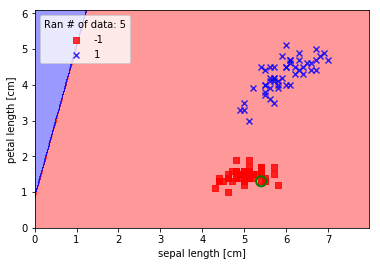

---- Ran over 5 data, stop at id 4 ----
weight :[ 0.    0.2   1.18]
misclass (online): 4
misclass (test)  : 50


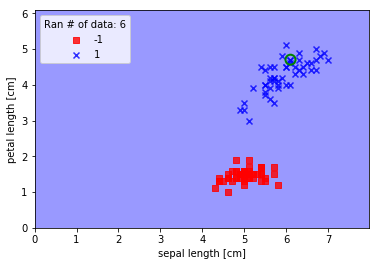

---- Ran over 6 data, stop at id 5 ----
weight :[-0.2  -0.76  0.8 ]
misclass (online): 5
misclass (test)  : 50


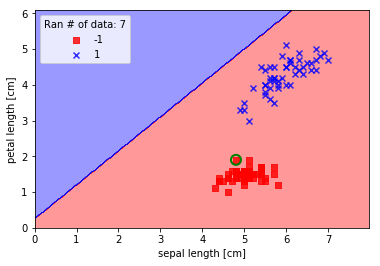

---- Ran over 7 data, stop at id 6 ----
weight :[ 0.    0.34  1.6 ]
misclass (online): 6
misclass (test)  : 50


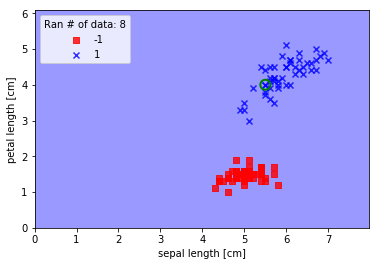

---- Ran over 9 data, stop at id 8 ----
weight :[-0.2  -0.56  1.34]
misclass (online): 7
misclass (test)  : 0


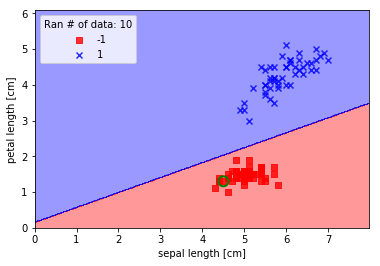

In [19]:
for i in pps_test.errorId_:
    pps.fit(X, y, stop=i+1)
    plot_stop(pps)

### Conclusion
In general, the efficiency of learning time is much better with suffeled-order dataframe. With playing arround the random seed, the PLA will moving arround the belt within linear saperable region which is not really reliable. Other learning model may can improve, e.g. SVM.  